In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/house price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/house price/test.csv')

In [3]:
num_feats = data.dtypes[data.dtypes != 'object'].index
cat_feats = data.dtypes[data.dtypes == 'object'].index

print('수치형 변수: ', len(num_feats))
print('명목형 변수: ', len(cat_feats))

수치형 변수:  38
명목형 변수:  43


* GrLivArea 이상치 제거

In [4]:
data = data.drop(data[data['GrLivArea'] >= 4500].index)

In [5]:
all = pd.concat([data, test])
all.shape

(2917, 81)

* 결측 데이터 처리

In [6]:
for col in cat_feats:
    all[col].fillna('None', inplace = True)

In [7]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath', 'MasVnrArea', 'GarageYrBlt', 'GarageCars', 'GarageArea']:
    all[col].fillna(0, inplace = True)
all.fillna(all.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [8]:
all.isna().sum().sum()

0

* 사칙연산

In [9]:
all['Total_sqr_footage'] = all['BsmtFinSF1'] + all['BsmtFinSF2'] + all['1stFlrSF'] + all['2ndFlrSF']
all['Total_Bathrooms'] = all['FullBath'] + 0.5 * all['HalfBath'] + all['BsmtFullBath'] + 0.5 * all['BsmtHalfBath']
all['Total_porch_sf'] = all['OpenPorchSF'] + all['3SsnPorch'] + all['EnclosedPorch'] + all['ScreenPorch'] + all['WoodDeckSF']
all['TotalHouse'] = all['TotalBsmtSF'] + all['1stFlrSF'] + all['2ndFlrSF']
all['TotalArea'] = all['TotalBsmtSF'] + all['1stFlrSF'] + all['2ndFlrSF'] + all['GarageArea']
all['GrLivArea_OverallQual'] = all['GrLivArea'] * all['OverallQual']
all['LotArea_OverallQual'] = all['LotArea'] * all['OverallQual']

* 있다/없다

In [10]:
all['haspool'] = all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all['hasgarage'] = all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all['hasbsmt'] = all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all['hasfireplace'] = all['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

* 연산에 사용된 변수들 제거

In [11]:
all = all.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath',
          'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch',
          'ScreenPorch', 'WoodDeckSF', 'TotalBsmtSF', 'GarageArea', 'GrLivArea',
          'OverallQual', 'LotArea', 'PoolArea', 'GarageArea', 'Fireplaces', 'Id'], axis = 1)
all.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'TotalHouse',
       'TotalArea', '

* One-Hot Encoding

In [12]:
allc = pd.get_dummies(all)
allc.columns

Index(['MSSubClass', 'LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr',
       ...
       'SaleType_New', 'SaleType_None', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=301)

In [12]:
allc = allc.drop('SalePrice', axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(allc)
allcs = scaler.transform(allc)
allcs

array([[ 0.0673546 , -0.2009671 , -0.21643665, ..., -0.12657919,
         0.46303851, -0.30145496],
       [-0.87327191,  0.52010594, -0.06910838, ..., -0.12657919,
         0.46303851, -0.30145496],
       [ 0.0673546 , -0.05675249,  0.14227566, ..., -0.12657919,
         0.46303851, -0.30145496],
       ...,
       [-0.87327191,  4.36582886,  1.26325161, ..., -0.12657919,
        -2.15964758, -0.30145496],
       [ 0.65524616, -0.34518171,  0.03863342, ..., -0.12657919,
         0.46303851, -0.30145496],
       [ 0.0673546 ,  0.23167673, -0.06564937, ..., -0.12657919,
         0.46303851, -0.30145496]])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(allcs)

allcsp = pca.transform(allcs)
print('원본', str(allcs.shape))
print('축소', str(allcsp.shape))

원본 (2917, 313)
축소 (2917, 50)


In [15]:
import numpy as np
import matplotlib.pyplot as plt

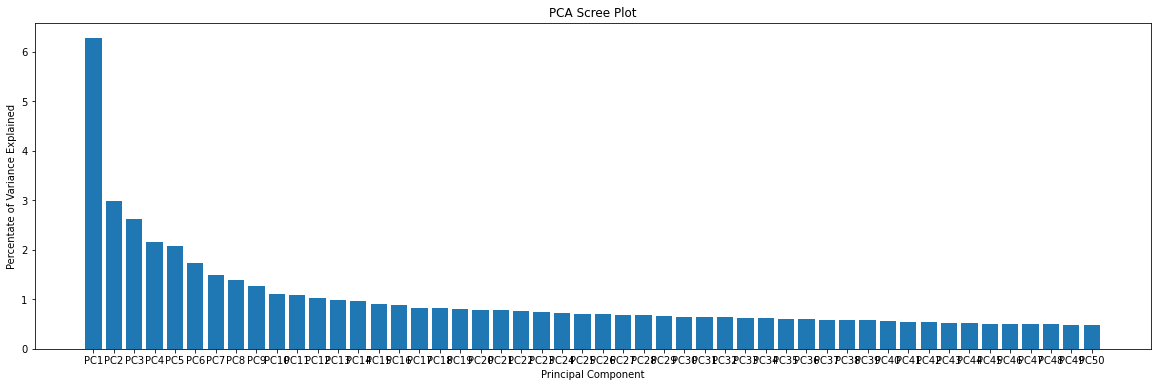

In [16]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    
plt.figure(figsize = (20,6))
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

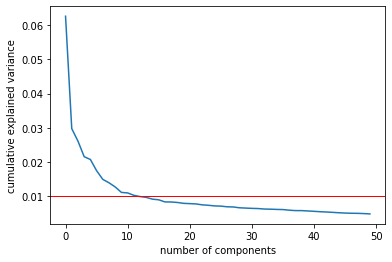

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.axhline(y = 0.01, color = 'r', linewidth = 1)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

In [19]:
allcspd = pd.DataFrame(allcsp[:,:20], columns = [f'PC{i+1}' for i in range(20)])

In [13]:
tr = allc[:len(data)]
te = allc[len(data):]

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
X = tr.drop('SalePrice', axis = 1)
y = np.log(tr['SalePrice'])

X_tr, X_vld, y_tr, y_vld = train_test_split(X, y,
                                         test_size = 0.2,
                                         random_state = 2000)

* XGBoost
0.14076986038060366 <br>
0.12317834376157624 (GrLivArea 이상치 2개 제거) <br>
0.12457791739846666 (Id 변수 제거) <br>
0.12487248942198959 (Exterior1st, 2nd 제거) <br>
0.11369552964235004 (SalePrice 이상치 2개 제거) <br>
0.1450483195114973 (PCA 20개) <br>
0.11463115850108373 (xgb parameter 변경)

In [16]:
import xgboost
from sklearn.metrics import mean_squared_error

In [17]:
xgb = xgboost.XGBRegressor(objective = 'reg:squarederror', n_estimators = 3000,
                           learning_rate = 0.05, max_depth =4)
xgb.fit(X_tr, y_tr)
print(mean_squared_error(y_vld, xgb.predict(X_vld))**0.5)

0.11463115850108373


* feature_importance

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

* Exterior2nd
* Exterior1st

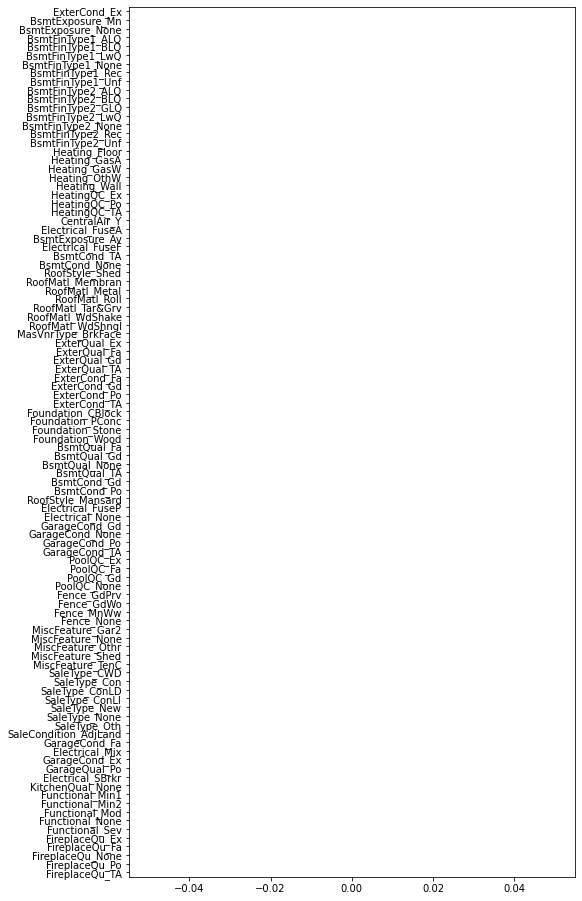

In [21]:
fi = xgb.feature_importances_
fs = pd.Series(fi, index = X_tr.columns)
ft = fs.sort_values(ascending = True)[:100]

plt.figure(figsize = (8, 16))
sns.barplot(x = ft, y = ft.index)

* submission

In [18]:
sub = pd.DataFrame()
sub['ID'] = test['Id']
sub['SalePrice'] = np.exp(xgb.predict(te.drop('SalePrice', axis = 1)))

sub.to_csv('xgb.csv', index = False)